In [1]:
%pip install scikit-learn pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [55]:
import sklearn
import pandas as pd
import numpy as np
import math

In [20]:
## Load the diabetes dataset
from sklearn import datasets
data = datasets.load_diabetes(as_frame=True)

target = data.target
data = data.data

In [26]:
## Preprocessing the data : No Need to do anything as the data is already preprocessed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [27]:
def split(data, target, test_size=0.2):
    n = len(data)
    n_test = int(n * test_size)
    n_train = n - n_test
    train_data = data.iloc[:n_train]
    test_data = data.iloc[n_train:]
    train_target = target.iloc[:n_train]
    test_target = target.iloc[n_train:]
    return train_data, test_data, train_target, test_target

In [29]:
## Split the data into training and testing data
train_data, test_data, train_target, test_target = split(data, target, 0.3)
print(train_data.shape, test_data.shape, train_target.shape, test_target.shape)

(310, 10) (132, 10) (310,) (132,)


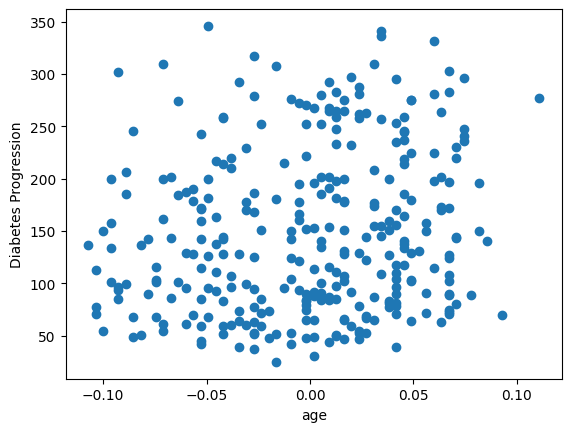

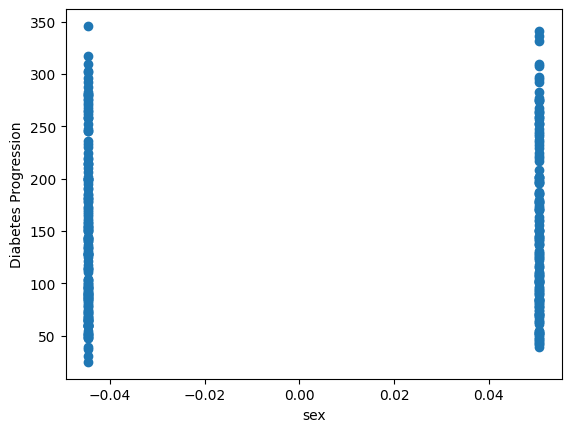

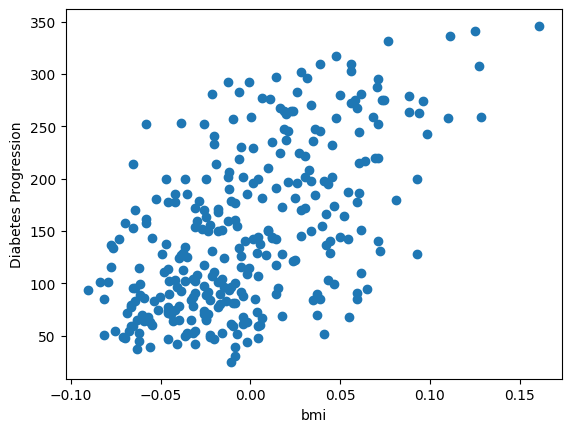

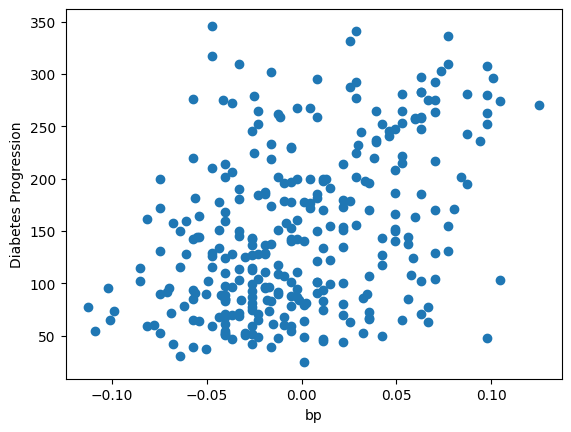

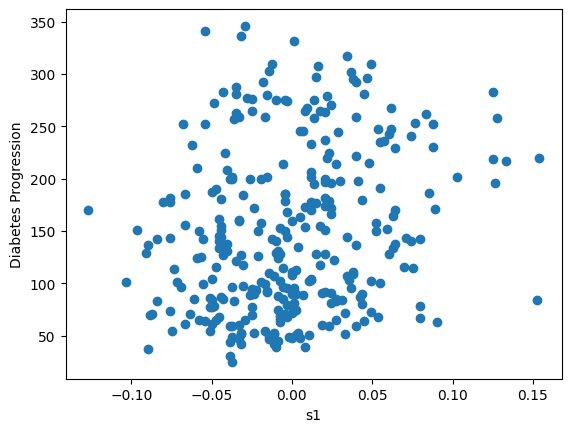

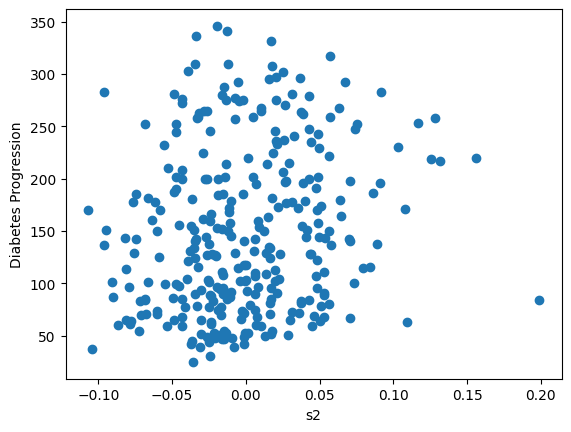

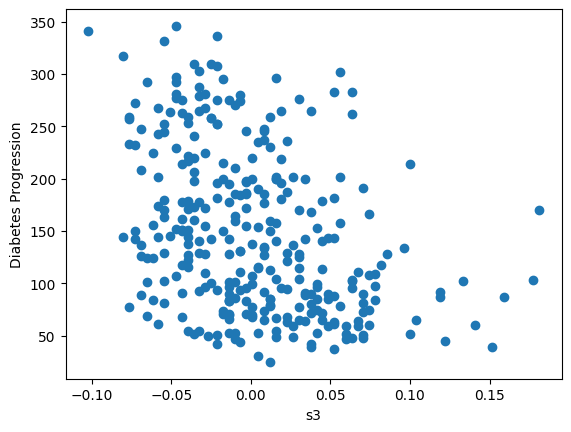

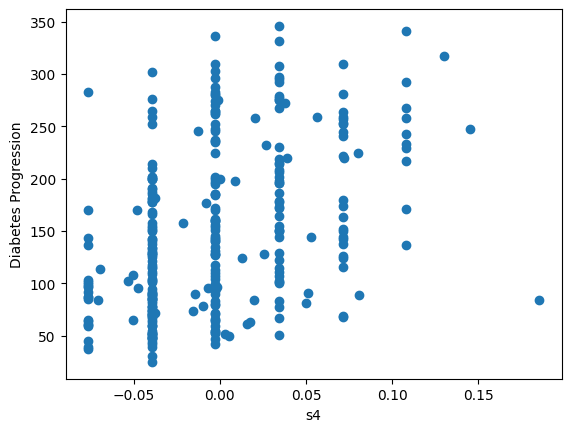

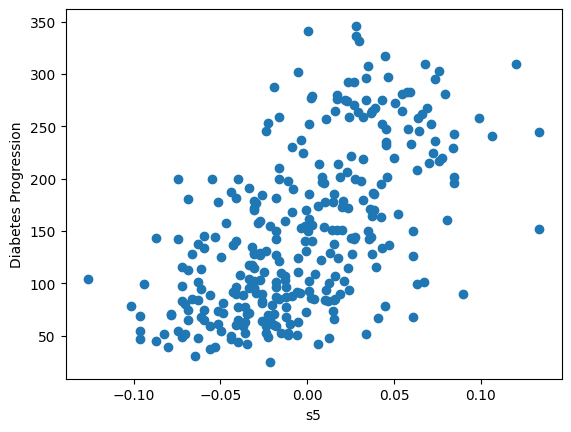

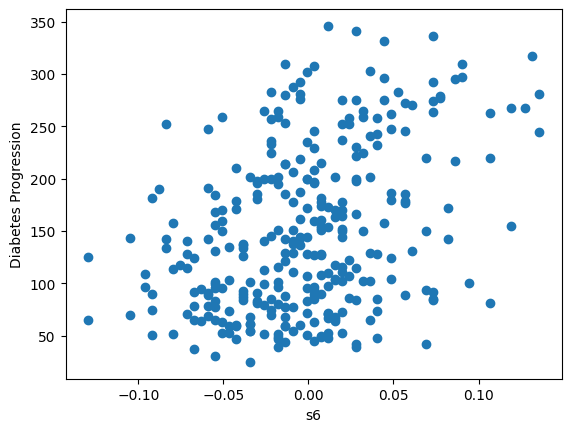

In [41]:
import matplotlib.pyplot as plt

features = train_data.columns

for feature in features:
    x = train_data[feature]
    y = train_target
    plt.scatter(x,y)
    plt.xlabel(feature)
    plt.ylabel('Diabetes Progression')
    plt.show()


<h2> Linear Regression </h2>

In [51]:

def cost_function(x, y, w, b):

    yh = np.dot(x, w) + b
    cost = np.sum((y - yh)**2) / (2 * len(y))

    return cost


In [52]:
total_cost = cost_function(train_data.iloc[:,2], train_target, 1, 0.9)
print("Total cost of w={0}, b={1} is {2}".format(1, 0.9, total_cost))

Total cost of w=1, b=0.9 is 14046.579465373263


In [53]:
def compute_gradient(x, y, w, b):
    n = len(y)
    yh = np.dot(x, w) + b
    dw = (1/n) * np.sum(np.dot(yh-y, x.T))
    db = (1/n) * np.sum(yh-y)

    return dw, db

In [54]:
dw, db = compute_gradient(train_data.iloc[:,0], train_target, 1, 0.9)
print("dw = {0}, db = {1}".format(dw, db))

dw = -0.5159805183859892, db = -148.5974727056131


In [64]:
def gradient_descent(x, y, w, b, learning_rate, n_iterations):
    
    J_history = []
    w_history = []

    W = w
    B = b

    for i in range(n_iterations):
        dw, db = compute_gradient(x, y, W, B)
        W = W - learning_rate * dw
        B = B - learning_rate * db
        J = cost_function(x, y, W, B)
        J_history.append(J)
        

        if i% math.ceil(n_iterations/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        

    return W, B, J_history, w_history

In [69]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(train_data.iloc[:,2], train_target, initial_w, initial_b, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 13958.83   
Iteration  150: Cost  3537.74   
Iteration  300: Cost  3020.52   
Iteration  450: Cost  2989.03   
Iteration  600: Cost  2981.39   
Iteration  750: Cost  2974.97   
Iteration  900: Cost  2968.64   
Iteration 1050: Cost  2962.36   
Iteration 1200: Cost  2956.12   
Iteration 1350: Cost  2949.91   
w,b found by gradient descent: 30.539579655857093 149.5557090881157


In [70]:
m = y.shape[0]
predicted = np.zeros(m)
X = train_data.iloc[:,2]
for i in range(m):
    predicted[i] = w * X[i] + b

Text(0.5, 0, 'Age')

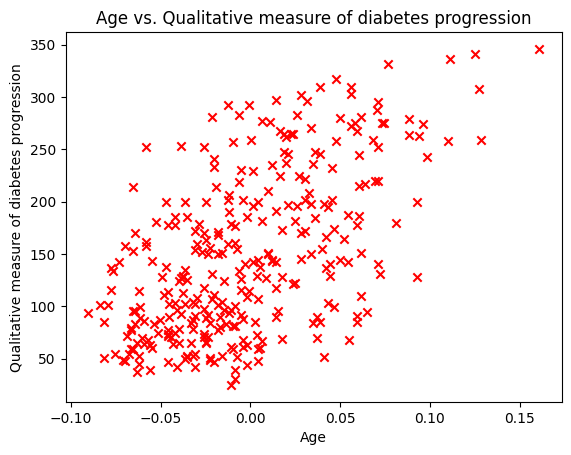

In [72]:

plt.scatter(X, train_target, marker='x', c='r')
plt.title("Age vs. Qualitative measure of diabetes progression")
plt.ylabel("Qualitative measure of diabetes progression")
plt.xlabel("Age")

<hr>


<h1> Linera Regression Using Scikit-learn </h1>

In [80]:
dfwhite = pd.read_csv('./winequality-white.csv', sep=';')
dfwhite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [81]:
dfred = pd.read_csv('./winequality-red.csv', sep=';')
dfred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [82]:
dfwhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [86]:
## Preprocessing the data


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_dfwhite = scaler.fit_transform(dfwhite)
std_dfwhite = pd.DataFrame(std_dfwhite, columns=dfwhite.columns)
std_dfwhite

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,0.137870
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,0.137870
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,0.137870
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,0.137870
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282,0.137870
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008,-0.991374
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544,0.137870
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572,1.267114


In [87]:
X = std_dfwhite.drop('quality', axis=1)
Y = std_dfwhite['quality']

train_data, test_data, train_target, test_target = split(X, Y, 0.3)

In [89]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_data, train_target)


LinearRegression()

In [93]:
from sklearn.metrics import mean_squared_error


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

print("Feature importances:", model.feature_names_in_)

prediction = model.predict(test_data)
mse = mean_squared_error(test_target, prediction)
print("Mean Squared Error on train set: ", mse)

prediction2 = model.predict(train_data)
mse2 = mean_squared_error(train_target, prediction2)
print("Mean Squared Error on test set: ", mse2)


Coefficients: [ 4.96625552e-02 -1.85867987e-01  9.03001500e-05  4.70036692e-01
  1.86999188e-03  8.55801113e-02 -9.76121397e-03 -5.29298861e-01
  1.34753135e-01  1.05401970e-01  3.03807334e-01]
Intercept: 0.05206890826793769
Feature importances: ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Mean Squared Error on train set:  0.6582236988954493
Mean Squared Error on test set:  0.7544086826579862
